In [1]:
%matplotlib inline
IFrame_width_px = 1024
IFrame_heigth_px = 600


In [2]:
import os
import json
import requests
import zipfile
import pandas as pd
import geopandas as gpd
import folium
import osmnx as ox
import random
from IPython.display import HTML, IFrame
from IPython.lib.pretty import pprint

# Geospatial data analysis and visualization in Python

## PyCon JP 2017

## Halfdan Rump


# 日本語もオッケーっすよ！

<img src="images/dg.png" style="width:50%">

<img src="images/lab_black.png" style="width:30%">

# What is geospatial data visualization?

# I'll show you how to make maps in Python

# I'll show you how to make *interactive* maps in Python

# First we will make a simple map

In [3]:
IFrame(src='html/tokyo_wards_choropleth.html', width=IFrame_width_px, height=IFrame_heigth_px)

# It's simple, so I'll show you the actual code

# Then we'll add more detail

In [4]:
IFrame(src='html/cityblock_choropleth_shinjuku-3000.html', width=IFrame_width_px, height=IFrame_heigth_px)

# more complicated, so I won't show much code

# Finally we'll make this

In [5]:
IFrame(src='html/choropleth_with_timeslider.html', width=IFrame_width_px, height=IFrame_heigth_px)

# visualize data changes over space

# visualize data changes over time

# what data are we plotting?

<img src="images/tabelog_logo.png" style="width:66%">

# Our team got data from Tabelog!

<img src="images/datadog.png">
credit: Telegram Just Zoo it!

# Let's take a look...

In [6]:
data = pd.read_table('data/query_areas.txt', dtype={'zipcode': str})
data.reset_index(inplace=True, drop=True)
data.sample(5)

,northlatitude,eastlongitude,zipcode,review_count,total_score_ave,area3_name
706187,34.586204,135.714230,6360082,24,3.46,新王寺
92558,34.697354,135.501339,5300001,11,3.97,梅田
467249,35.968060,139.590300,3620042,1,3.50,上尾
40984,35.640797,139.673473,1540004,17,3.65,三軒茶屋
57418,35.457253,139.630277,2200012,60,3.11,新高島


# Coordinates and a score 

# Just what we need to make a map :)

# before we get started... I may have found a conspiracy

In [7]:
data[['northlatitude', 'eastlongitude']].mean()

northlatitude     35.412935
eastlongitude    135.478591
dtype: float64

<img src="images/obama.png" style="width:100%">

<img src="images/conspiracycat.jpg">
credit: Telegram Just Zoo it!

# I'll show you how to make choropleths in Python

# choropleth = 階級区分図・かいきゅうくぶんず

# a choropleth is a certain kind of map

# plot area borders

# plot with colors that reflect some statistic

<img src="images/wards_notinteractive.png">

# choropleths are easy to interpret

# choropleths are pretty :)

# There are several different ways of plotting data on a map

# Read more [here](https://blog.mapbox.com/right-way-visualize-data-945d6010fab0)

# Why do I want them to be interactive?

# Because it's much more fun :)

# interactive maps are a tool for discovery

In [8]:
IFrame(src='html/tokyo_wards_choropleth.html', width=IFrame_width_px, height=IFrame_heigth_px)

# I wanted a detailed map of which areas has the best (or worst) restaurants,  and when

# Time to code!

# Making a Choropleth of restaurant scores in Tokyo


In [9]:
IFrame(src='html/tokyo_wards_choropleth.html', width=1024, height=600)

# collect ward boundaries

In [10]:
IFrame(src='html/wards_boundaries.html', width=1024, height=600)

< img src="images/tokyo_ward_boundaries.png" style="width:66%;">

# where to get the boundry data

# the Internet ;)

In [11]:
url = 'https://raw.githubusercontent.com/dataofjapan/land/master/tokyo.geojson'
filename = 'tokyo_wards.geojson'

### Load wards geojson data, or download if not already on disk
if not os.path.exists(filename):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(json.dumps(json.loads(r.content.decode())))



# More on how to collect boundaries with python later...

# let's see what we have

In [12]:
with open('data/tokyo_wards.geojson') as f: 
    wards = json.loads(f.read())

print('type: ', type(wards))
print('keys: ', wards.keys())
print()
   

type:  <class 'dict'>
keys:  dict_keys(['crs', 'features', 'type'])



In [13]:
 pprint(wards['features'][0], max_seq_length = 10)

{'geometry': {'coordinates': [[[139.821051, 35.815077],
    [139.821684, 35.814887],
    [139.822599, 35.814509],
    [139.8229070000001, 35.81437],
    [139.822975, 35.814339],
    [139.822977, 35.814338],
    [139.823188, 35.814242],
    [139.823348, 35.81417],
    [139.823387, 35.814152],
    [139.823403, 35.814138],
    ...]],
  'type': 'Polygon'},
 'properties': {'area_en': 'Tokubu',
  'area_ja': '都区部',
  'code': 131211,
  'ward_en': 'Adachi Ku',
  'ward_ja': '足立区'},
 'type': 'Feature'}


<img src="images/geojson.png" style="width:66%">

In [14]:
!du -h tokyo_wards.geojson

5.8M	tokyo_wards.geojson


In [15]:
IFrame(src='html/wards_boundaries.html', width=1024, height=600)

# I wish I could efficiently handle such data...

# ... I wish there was something like pandas for geospatial data, with, maybe I dunno, a geo-dataframe or something?

In [16]:
import geopandas as gpd
wards = gpd.read_file('data/tokyo_wards.geojson')

In [17]:
wards.head()
#wards.plot(figsize=(10,10));

,area_en,area_ja,code,geometry,ward_en,ward_ja
0,Tokubu,都区部,131211,"POLYGON ((139.821051 35.815077, 139.821684 35....",Adachi Ku,足立区
1,Tokubu,都区部,131059,"POLYGON ((139.760933 35.732206, 139.761002 35....",Bunkyo Ku,文京区
2,Tokubu,都区部,131016,"POLYGON ((139.770135 35.705352, 139.770172 35....",Chiyoda Ku,千代田区
3,Tokubu,都区部,131067,"POLYGON ((139.809714 35.728135, 139.809705 35....",Taito Ku,台東区
4,Tokubu,都区部,131091,"(POLYGON ((139.719199 35.641847, 139.719346 35...",Shinagawa Ku,品川区


# What's in the `geometry` column?

In [18]:
wards.set_index('ward_ja', inplace=True)
type(wards.loc['新宿区', 'geometry'])

shapely.geometry.polygon.Polygon

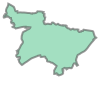

In [19]:
polygon = wards.loc['新宿区', 'geometry']
polygon

# workflow with `GeoDataFrame` is more or less identical to `pandas.DataFrame`

# `geopandas` is a great library!

<img src="images/applause.png">

# So, we can hold the boundary data in a `GeoDataFrame`

# How do we plot them? 

In [20]:
wards.reset_index(inplace=True)

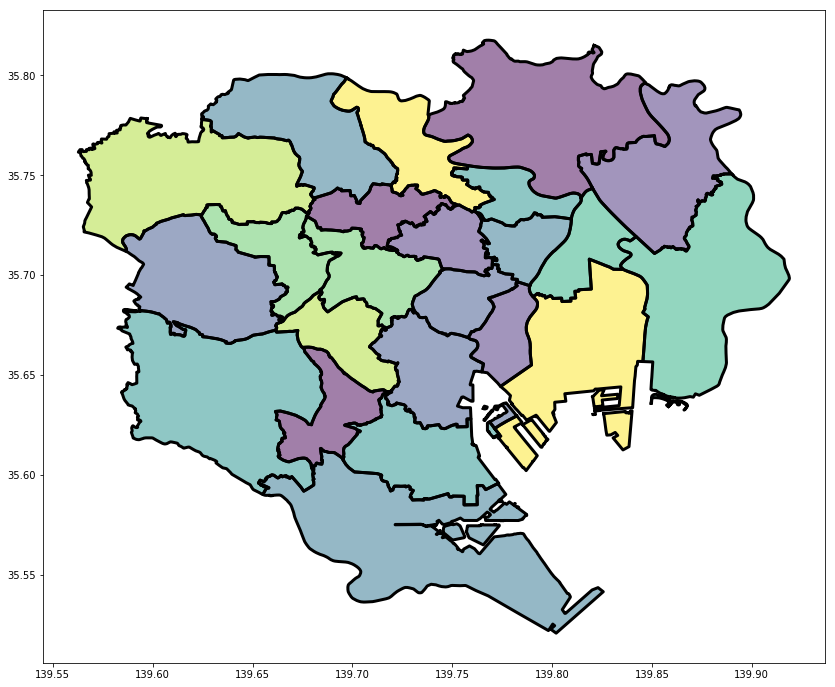

In [21]:
wards[wards['ward_ja'].str.contains('区')].plot(
    figsize=(15,12), linewidth=3, edgecolor='black');

# very fast to make, but...

# we want something that runs in the browser

# Introducing `folium`

<img src="images/folium.png" style="width:15%;">

<img src="images/leaflet.png" style="width:40%;">

<img src="images/d3.png" style="width:15%;">

# Making a map in two lines

In [22]:
import folium

tokyo_center=(35.7035007,139.6524644)

m = folium.Map(location=tokyo_center, zoom_start=11)
folium.GeoJson(wards.to_json()).add_to(m)
m.save('html/folium_boundaries.html')

In [23]:
IFrame('html/folium_boundaries.html', height=IFrame_heigth_px, width=IFrame_width_px)

# We can use zipcodes to link restaurants to wards

In [24]:
data[['northlatitude', 'eastlongitude', 'zipcode', 'area3_name']].sample(5)

,northlatitude,eastlongitude,zipcode,area3_name
566233,35.745934,139.695896,1730032,大山
5452,40.820994,140.741087,0300862,青森
637667,36.655433,138.191164,3810000,権堂
354392,31.789376,130.723916,8996404,表木山
431838,35.684318,139.727386,1600004,四谷三丁目


# Download zipcodes from Japan Post website

In [25]:
### Download zipcodes data
zipcodes_zip = 'http://www.post.japanpost.jp/zipcode/dl/oogaki/zip/13tokyo.zip'

if not os.path.exists('data/13TOKYO.CSV'):
    r = requests.get('http://www.post.japanpost.jp/zipcode/dl/oogaki/zip/13tokyo.zip')
    with open('/tmp/tokyo_zipcodes.zip', 'wb') as f: 
        f.write(r.content)
    z = zipfile.ZipFile('/tmp/tokyo_zipcodes.zip')
    z.extractall('data/')

# Read into dataframe

In [26]:
data = pd.read_table('data/query_areas.txt', dtype={'zipcode': str})
data.reset_index(inplace=True, drop=True)
wards = gpd.GeoDataFrame.from_file('data/tokyo_wards.geojson')

In [27]:
zipcodes = pd.read_csv('data/13TOKYO.CSV', encoding = 'shift-jis', header=None, 
               dtype=str)
zipcodes = zipcodes[[2, 7]]
zipcodes.columns = ['zipcode', 'ward']
zipcodes.set_index('zipcode', inplace=True)
zdict = zipcodes['ward'].to_dict()
zipcodes.sample(5)

,ward
zipcode,
1606105,新宿区
1086105,港区
1006211,千代田区
1440052,大田区
1066132,港区


In [28]:
ward_map = data['zipcode'].apply(lambda x: zdict.get(x))
data = data.assign(ward=ward_map)
data = data[data['ward'].notnull()]
areas = set(wards['ward_ja']).intersection(set(data['ward'].unique()))
wards.set_index('ward_ja', inplace=True)
wards = wards.loc[areas]
data = data.set_index('ward').loc[areas].reset_index()
wards.drop('小笠原村', inplace=True)
data = data.set_index('ward').drop('小笠原村').reset_index()

# map from zipcode to ward

In [29]:
zipcodes.sample(5)

,ward
zipcode,
1630437,新宿区
1076242,港区
1630250,新宿区
1110052,台東区
1100015,台東区


# map restaurants to areas in Tokyo

In [30]:
data.sample(5)

,ward,northlatitude,eastlongitude,zipcode,review_count,total_score_ave,area3_name
140152,港区,35.656122,139.731141,1060032,22,3.19,六本木
105272,中央区,35.683269,139.785155,1030013,2,3.47,人形町
97024,文京区,35.705690,139.774493,1130034,23,3.10,湯島
37901,練馬区,35.750053,139.634491,1790075,6,3.15,練馬春日町
147327,港区,35.668359,139.729176,1070062,5,3.02,青山一丁目


# sanity check - where is the geographical mean?

In [31]:
data[['northlatitude', 'eastlongitude']].mean()

northlatitude     35.668068
eastlongitude    139.650324
dtype: float64

<img src="images/meidaimae.png" style="width:100%">

# It's time to calculate statistics for each ward

In [32]:
groups = data[['review_count', 'total_score_ave', 'ward']].groupby('ward')
stats = groups.agg('mean').sort_values(by='total_score_ave', ascending=False)
counts = groups.size()

In [33]:
stats = stats.assign(count=counts)
stats.head(10)

,review_count,total_score_ave,count
ward,,,
西東京市,6.903305,2.888752,817
清瀬市,5.931624,2.867308,234
杉並区,11.742827,2.865094,4810
東村山市,7.399381,2.862864,646
国立市,8.436426,2.843436,582
港区,22.841448,2.838996,16020
日野市,6.087566,2.830088,571
中央区,25.086408,2.824059,11897
葛飾区,8.505640,2.822050,2571


In [34]:
stats.tail(10)

,review_count,total_score_ave,count
ward,,,
東久留米市,5.412844,2.666697,436
東大和市,5.721154,2.661891,312
多摩市,6.726415,2.621450,848
武蔵村山市,7.125000,2.618581,296
三鷹市,9.731675,2.604777,764
板橋区,6.856051,2.586006,3140
稲城市,5.235849,2.520535,318
調布市,9.902878,2.370072,1390
狛江市,5.848101,2.143608,316


In [35]:
# data.plot.scatter('eastlongitude', 'northlatitude', s=5, figsize=(15,15))

In [36]:
# from matplotlib import cm
# cmap = cm.get_cmap('OrRd')

# z_lat = np.absolute(zscore(data['northlatitude'])) < 0.7
# z_lon = np.absolute(zscore(data['eastlongitude'])) < 0.7

# data[z_lat & z_lon].plot.scatter('eastlongitude', 'northlatitude', 
#                                  c='total_score_ave', cmap=cmap, 
#                                  s=1, # marker size
#                                  figsize=(20,15),
#                                 );


In [37]:
# d = data[['northlatitude', 'eastlongitude']].values[:1000]
# center = tuple(np.mean(d, axis=0))
# m = folium.Map(center, zoom_start=14, tiles='Stamen Toner')

# for marker in map(lambda c: folium.Marker(c), d):
#     marker.add_to(m)
# m

# Putting it all together

In [38]:
from branca.colormap import linear

### OrRd colormap is kind of similar to tabelog score colors
colormap = linear.OrRd.scale(
    stats['total_score_ave'].min(),
    stats['total_score_ave'].max())

colors = stats['total_score_ave'].apply(colormap)
colors.sample(5)

ward
稲城市     #f98355
多摩市     #ef6548
清瀬市     #a30704
青梅市     #cf2a1b
東大和市    #e8553b
Name: total_score_ave, dtype: object

In [39]:

m = folium.Map(location=tokyo_center, #tiles='Stamen Toner',
                    zoom_start=11)

folium.GeoJson(
    wards.to_json(),
    style_function=lambda feature: {
        'fillColor': colors.loc[feature['id']],
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.8,
        'highlight': True
    }
).add_to(m)

# folium.LayerControl().add_to(m)
m.add_child(colormap)
m.save('html/ward_choropleth_in_slides.html')
#folium.LayerControl().add_to(m)

In [40]:
IFrame(src='html/ward_choropleth_in_slides.html', height=IFrame_heigth_px, width=IFrame_width_px)

# Now we have a toolbox!

# boundaries as `shapely` Polygon objects in `geopandas` dataframe

# can plot them using `folium`

# What's next? 
<img src="images/pythonmug.jpg" style="width:50%">

# wards are sort of large

# the map we made is not very useful for discovery :( 

# Can we find boundaries for smaller areas?

# How about zipcodes?

<img src="images/qgis3.png">

# zipcodes administrative boundaries

# defined by the post service to serve their needs

# what about even smaller areas? 

# In general, what to do when there's no GeoJson?

<img src="images/thinking.png">

# so now I wanted to calculate city blocks

# areas encapsulated by roads

<img src="images/cityblocks_tab20.png" style="width:100%">

# why city blocks?

# city blocks are the smallest city unit 
(apart from individual buildings)

# city blocks reflect the topology of a city
(they are not "just" administrative boundaries)

# we can use the city roads to calculate city blocks

# where can we get the road data? 

# from OpenStreetMap 

# largest open map on the planet

# anybody can edit map data

<img src="images/osm.png">

<img src="images/osm2.png">

# all this data is free

# Download OSM data through the Overpass API

# Introducing `osmnx`

# short for Open Street Map NetworkX

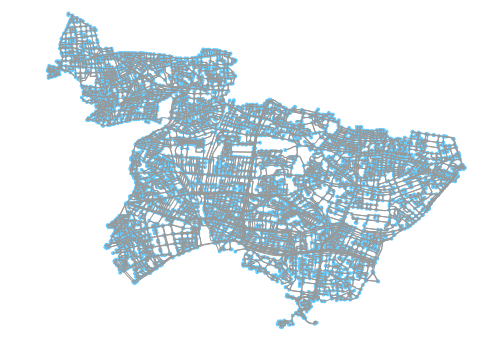

In [41]:
import osmnx as ox

ox.plot_graph(ox.graph_from_place('新宿区'));

In [42]:
shinjuku_origin = (35.6918383, 139.702996)

street_graph = ox.graph_from_point(
        shinjuku_origin, 
        distance=1000, # radius of 1000m 
        distance_type='network', 
        network_type='drive', # could also be 'bicycle', 'walk', etc.  
        simplify=False) # we'll see what this does in a moment

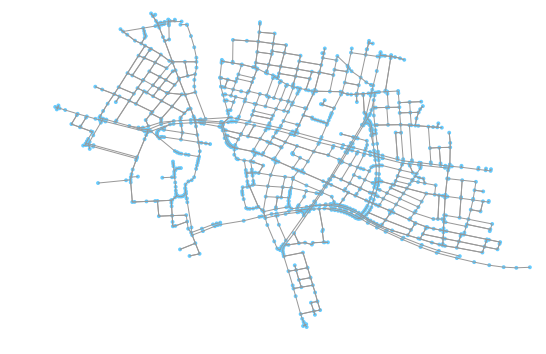

In [43]:
ox.plot_graph(street_graph);

# data is stored as a `networkx` directed graph

In [44]:
print(type(street_graph))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


# roads are edges

# road intersections are nodes

In [45]:
street_graph.nodes(data=True)[:5]

[(1666084493, {'osmid': 1666084493, 'x': 139.6979529, 'y': 35.6981751}),
 (1519087617, {'osmid': 1519087617, 'x': 139.7016291, 'y': 35.6922784}),
 (2450450434,
  {'highway': 'traffic_signals',
   'osmid': 2450450434,
   'x': 139.6987805,
   'y': 35.6900131}),
 (4717672458,
  {'highway': 'crossing',
   'osmid': 4717672458,
   'x': 139.7016464,
   'y': 35.6960468}),
 (295405191, {'osmid': 295405191, 'x': 139.6994617, 'y': 35.6887217})]

# `osmnx` can plot with `folium`

In [46]:
ox.plot_graph_folium(street_graph, edge_opacity=0.8)

<img src="images/osmnxfolium.png">

# `osmnx` can calculate useful statistics

In [47]:
ox.basic_stats(street_graph)

{'circuity_avg': 0.99999999999999856,
 'count_intersections': 1170,
 'edge_density_km': None,
 'edge_length_avg': 29.644130321357416,
 'edge_length_total': 60088.652161391481,
 'intersection_density_km': None,
 'k_avg': 3.301302931596091,
 'm': 2027,
 'n': 1228,
 'node_density_km': None,
 'self_loop_proportion': 0.0,
 'street_density_km': None,
 'street_length_avg': 28.67747946921893,
 'street_length_total': 42815.476847543861,
 'street_segments_count': 1493,
 'streets_per_node_avg': 2.4315960912052117,
 'streets_per_node_counts': {0: 0, 1: 58, 2: 707, 3: 345, 4: 112, 5: 5, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.04723127035830619,
  2: 0.5757328990228013,
  3: 0.28094462540716614,
  4: 0.09120521172638436,
  5: 0.004071661237785016,
  6: 0.0008143322475570033}}

# you can use `networkx` algorithms

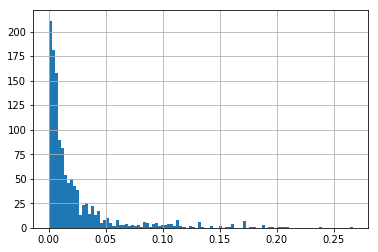

In [48]:
import networkx as nx
b = nx.algorithms.betweenness_centrality(street_graph)
pd.Series(list(b.values())).hist(bins=100);

# `osmnx` is another tool for our toolbox!

# written by Geoff Boeing

# Now we can easily get street data

# How do we calculate the city blocks?

# finding certain kinds of cycles in the street graph

<img src="images/osmnxfolium.png">

# I couldn't find an implementation

# but I found description of an algorithm  [here](https://blog.reactoweb.com/2012/04/algorithm-101-finding-all-polygons-in-an-undirected-graph/)

# so I decided to implement it


# The algorithm

- Pick a starting node
- Walk forward, while always turning left until you return to starting point
- Never walk the same road in the same direction twice
- Handle some edge cases

<img src="images/osmnxfolium.png">

```python 
def angle(a,b):
#     print(a, b)
    return degrees(arccos(dot(a, b)/(norm(a)*norm(b))))*sign(cross(b,a))

def step(graph, edge, path, depth):
    depth += 1
    
    # create list of successors to the edge
    successors = [(edge[1], n) for n in graph.neighbors(edge[1])]

    # Remove edge in the opposite direction, so that the algorithm doesn't simple jump back to the previous point
    successors.remove(tuple(np.flip((edge),0)))
    
    # Remove edges that have already been traversed
    successors = list(filter(lambda s: s not in traversed, successors))

    if not successors: 
        # The successors have all been walked, so no more areas can be found 
        return 

    # calculate angles to incoming edge and order successors by smallest angle
    angles = [angle(edge_coords.get(edge), edge_coords.get(successor)) for successor in successors]
    
    # pick leftmost edge
    edge_to_walk = successors[np.argmin(angles)]
        
    if edge_to_walk in path:
        traversed.update([edge_to_walk])
        #We are back where we started, which means that we found a polygon
        graph_polygons.append(path)
        return
    else:
        if depth > MAX_RECURSION_DEPTH:
            return
        path.append(edge_to_walk)   
        step(graph, edge_to_walk, path, depth)

graph = street_graph.to_directed()

# pre-compute mapping from edge name to edge coordinates
edge_coords = {(f,t): 
               ([float(graph.node.get(f).get(lat_key))-float(graph.node.get(t).get(lat_key)), 
                 float(graph.node.get(f).get(lon_key))-float(graph.node.get(t).get(lon_key))]) 
               for (f, t, d) in graph.edges(data=True)}

traversed = set()
graph_polygons = list()

for edge in tqdm(graph.edges()):
    path = [edge]
    step(graph, edge, path, depth=0)
    
# Remove the polygon with the most nodes (assuming that it is the perimeter
graph_polygons = sorted(graph_polygons, key=lambda x: len(x))[:-1]
print('Found {} polygons '.format(len(graph_polygons)))
```

# warning: recursive implementation!

# not trivial to parallelize

# let's use that to find city blocks in shinjuku!

<img src="images/shinjuku_cityblocks.png" style="width:100%">

# slow for large areas of dense city network

# Speeding up calculation


# Three ways that I could think of 
(apart from a more efficient, non-recursive implementation ;)

# limit the number of recursions to depth $d$ 

# constrains the algo to only find city blocks with $d$ corners  
(a corner is a node in the street graph).

# tremendous speedup with $d=10$

<img src="images/cityblocks_d10.png">

# deep recursion required to find complicated city blocks ($d=500$)

<img src="images/cityblocks_d500.png">

# Removing roads that are dead ends

# reduces number of edges and nodes

# does not change the shape of the city blocks

# Using simplified street graph

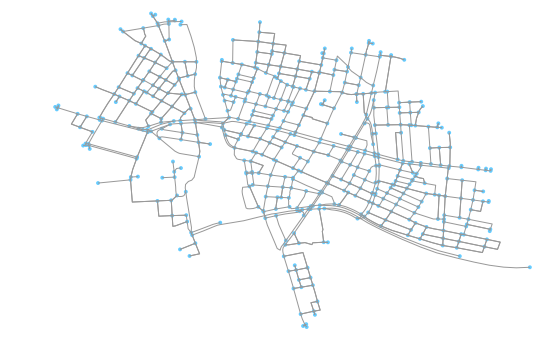

In [49]:
simple = ox.simplify_graph(street_graph)
ox.plot_graph(simple);

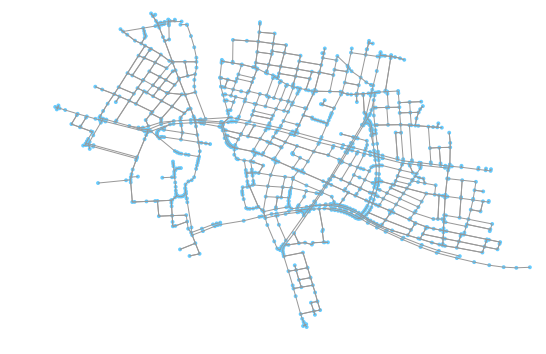

In [50]:
ox.plot_graph(street_graph);

# reduces number of edges and nodes

# This *does* change the shape of the city blocks

# Daikanyama using original street graph

In [51]:
IFrame(src='html/daikanyama_1000_notsimplified.html', width=1024, height=600)

# Daikanyama city blocks, using simplified road network

In [52]:
IFrame(src='html/daikanyama_1000_simplified.html', width=1024, height=600)

# So now we can quickly calculate city blocks

# Let's turn the city blocks into a choropleth

# we can no longer use zipcodes to map restaurants to ares

# place grid over area and calculate nearest grid

<img src="images/grid.png">

```python 
grid_size = 0.001
fdiv = lambda c: int(np.floor_divide(c, grid_size))
# Calculate grid for each point in polygons
# i.e. each polygon can be in multiple grids
grid_to_areas = {}
path_coords = [list(zip(*pol.exterior.coords.xy)) for pol in city_blocks.geometry]
for area_number, path in enumerate(path_coords):
    for point in path:
        grid = (fdiv(point[0]), fdiv(point[1]))
        if grid in grid_to_areas.keys():
            grid_to_areas[grid].update([area_number])
        else:
            grid_to_areas[grid] = set([area_number])
# Calculate grid for each restaurant
# Each restaurant can only be in a single grid
restaurant_to_grid = list(map(tuple,restaurants[coordinate_columns].applymap(fdiv).values))
restaurant_to_areas = {i:grid_to_areas.get(r) for i,r in enumerate(restaurant_to_grid)}
```
(more code...)

# Group by city block and calculate stats

# use review count for opacity

In [53]:
IFrame(src='html/python-popup-choroplethAVERAGE.html', width=IFrame_width_px, height=IFrame_heigth_px)

# Let's look at where the best restaurants are

In [54]:
IFrame(src='html/python-popup-choroplethBEST.html', width=IFrame_width_px, height=IFrame_heigth_px)

# Let's look at where the WORST restaurants are

In [55]:
IFrame(src='html/python-popup-choroplethWORST.html', width=IFrame_width_px, height=IFrame_heigth_px)

# Mapping time-dynamic data

# restaurant scores evolve over time

<img src="images/moving_average_scores.png">
<img src="images/moving_average_price.png">

# `folium` can make animations 

In [56]:
IFrame(src='http://dwilhelm89.github.io/LeafletSlider/', height=IFrame_heigth_px, width=IFrame_width_px)

# but I wanted a choropleth that could show change over time

# Made `TimeDynamicGeoJson` plugin for `folium`

``` python 
m = folium.Map(location=area_coords.get(area_name), tiles='Stamen Toner',
                    zoom_start=15)


g = TimeDynamicGeoJson(
    city_blocks.to_json(),
    styledict = styledict, 
    style_function=lambda feature: {
        'color': 'white',
        'weight': 0.2,
        'dashArray': '5, 5',
        'fillOpacity': 1,
    },
    highlight_function=lambda feature: {
        'weight': 1,
        'color': '#666',
        'dashArray': '',
        'fillOpacity': 1
    }
).add_to(m)

m.save('html/choropleth_with_timeslider.html')   
```

In [57]:
from IPython.display import HTML, IFrame
IFrame(src='html/choropleth_with_timeslider.html', width=1024, height=600)

# will submit pull request to `folium` 
(after fixing some bugs...  )

# Summary

# 1. Three high-level libraries


# `geopandas` is the base of geospatial data analysis

# `osmnx` gets, manipulates and analyses geo-data

# `folium` makes interactive maps

# A lot of other libraries are used under the hood
 (please see Links and References)

# My own contributions

# implementation of algo for calculating city blocks

# plugin for `folium` to make time dynamic choropleths 

# Why GIS in Python? ;)

<img src="images/unbearable.jpg">

# Thank you :)

# Links and References
- [code for this presentation](https://github.com/halfdanrump/geoviz)
- [`geopandas`](http://geopandas.org/)
- [`shapely` docs](https://shapely.readthedocs.io/en/latest/)
- [`folium` github examples](https://github.com/python-visualization/folium/tree/master/examples)
- [`networkx`](https://networkx.github.io/)
- [`osmnx`](https://github.com/gboeing/osmnx)
- [Boeing, G. 2017. “OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks.” Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004](http://www.sciencedirect.com/science/article/pii/S0198971516303970?via%3Dihub)  
- [Validating OpenStreetMap / Arun Ganesh](https://www.youtube.com/watch?v=7y5thJzBisA)
- [Dots vs. polygons: How I choose the right visualization](https://blog.mapbox.com/right-way-visualize-data-945d6010fab0)